# <span style="color:#8D35FF">Bootcamp</span> 2022 - regresja

In [2]:
# pakiety
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dane
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [84]:
# wczytywanie danych
gas = sm.datasets.get_rdataset("attitude", "datasets", cache=True).data
df = pd.DataFrame(gas)
#attitude

## <span style="color:#591BAB">Wizualizacja</span>

In [85]:
# dane
df.head()

,rating,complaints,privileges,learning,raises,critical,advance
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   rating      30 non-null     int64
 1   complaints  30 non-null     int64
 2   privileges  30 non-null     int64
 3   learning    30 non-null     int64
 4   raises      30 non-null     int64
 5   critical    30 non-null     int64
 6   advance     30 non-null     int64
dtypes: int64(7)
memory usage: 1.8 KB


In [96]:
df.describe().round(2)

,rating,complaints,privileges,learning,raises,critical,advance
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,64.63,66.60,53.13,56.37,64.63,74.77,42.93
std,12.17,13.31,12.24,11.74,10.40,9.89,10.29
min,40.00,37.00,30.00,34.00,43.00,49.00,25.00
25%,58.75,58.50,45.00,47.00,58.25,69.25,35.00
50%,65.50,65.00,51.50,56.50,63.50,77.50,41.00
75%,71.75,77.00,62.50,66.75,71.00,80.00,47.75
max,85.00,90.00,83.00,75.00,88.00,92.00,72.00


<span style="color:#591BAB">Korelacja</span> między zmiennymi

<AxesSubplot: >

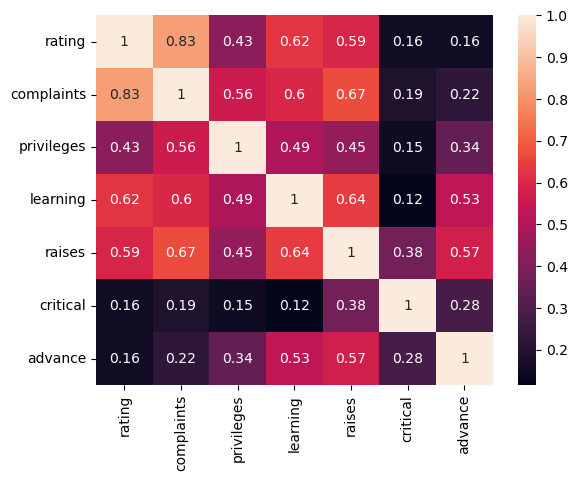

In [97]:
sns.heatmap(df.corr(), annot=True)

Wybór cechy, którą będziemy przwidywać (<span style="color:#591BAB">zmiennej zależnej</span> *ang. <span style="color:#591BAB">target</span>*) i cech za pomocą których będziemy przewidywać (<span style="color:#591BAB">zmiennych niezależnych</span> *ang. <span style="color:#591BAB">predictors</span>*)

In [77]:
target = 'rating'
predictors = [col for col in df.columns.to_list() if col != target]

Wykresy <span style="color:#591BAB">ramka-wąsy</span> (*ang. <span style="color:#591BAB">boxplot</span>*)

In [109]:
def boxplots(df, p):
    fig, axis = plt.subplots(2, 3, figsize=[20, 10])
    idx=0;
    axis=axis.flatten()
    for predictor in p:
        sns.boxplot(y=predictor, data=df[[predictor]], ax=axis[idx])
        idx+=1
            
    # plt.tight_layout()
    plt.show()

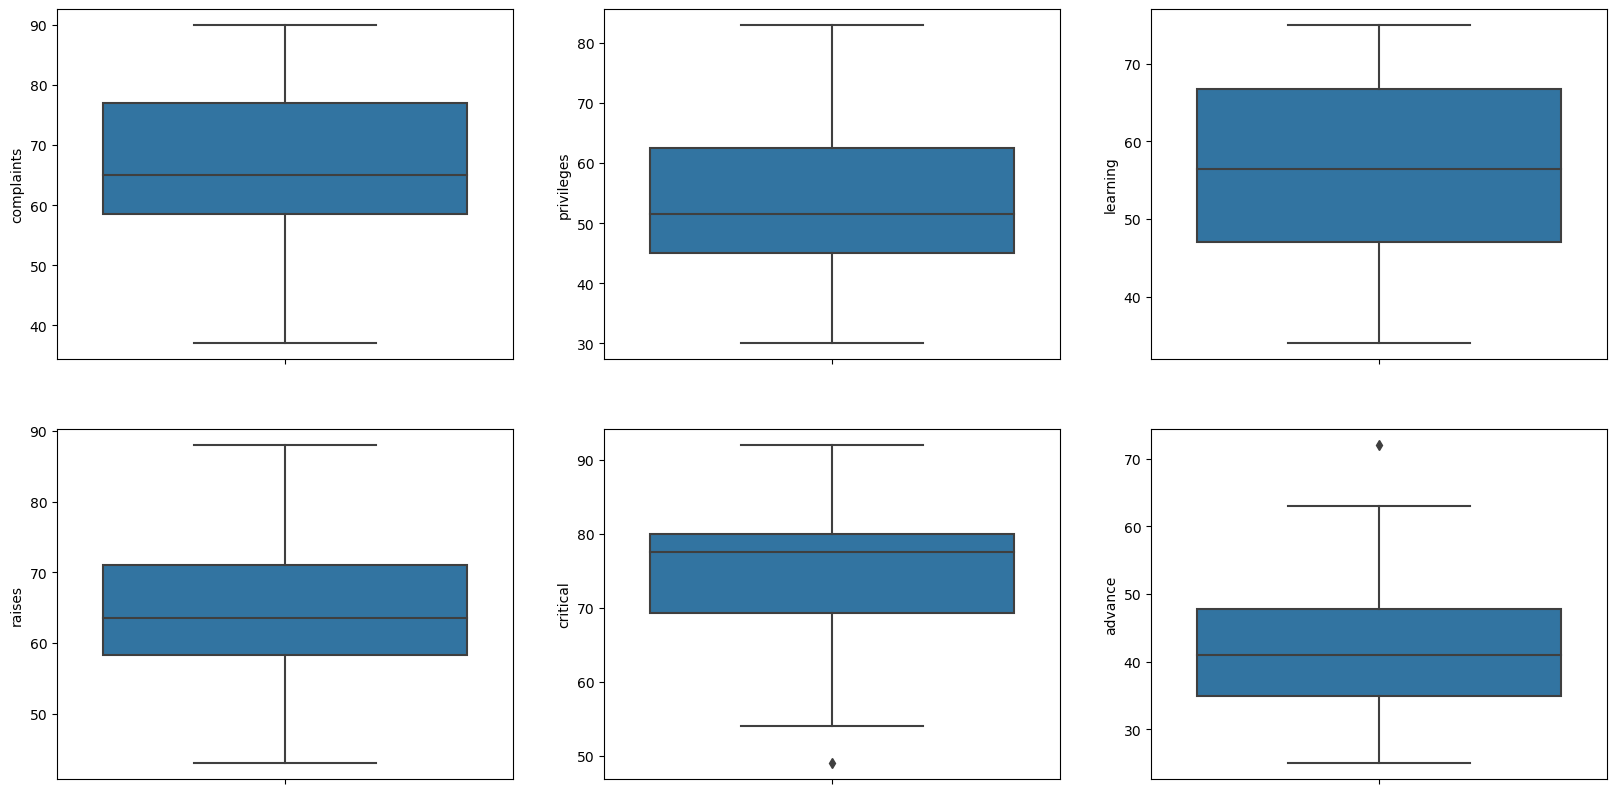

In [110]:
boxplots(df, predictors)

Usuwanie <span style="color:#591BAB">obserwacji odstających</span> (*ang. <span style="color:#591BAB">outliers</span>*)

In [101]:
for col in predictors:
    mean = df[col].mean()
    sd = df[col].std()
    df2 = df[(df[col] <= mean+(2*sd))]

In [105]:
df[df.isin(df2).all(axis=1)==False]

,rating,complaints,privileges,learning,raises,critical,advance
25,66,77,66,63,88,76,72


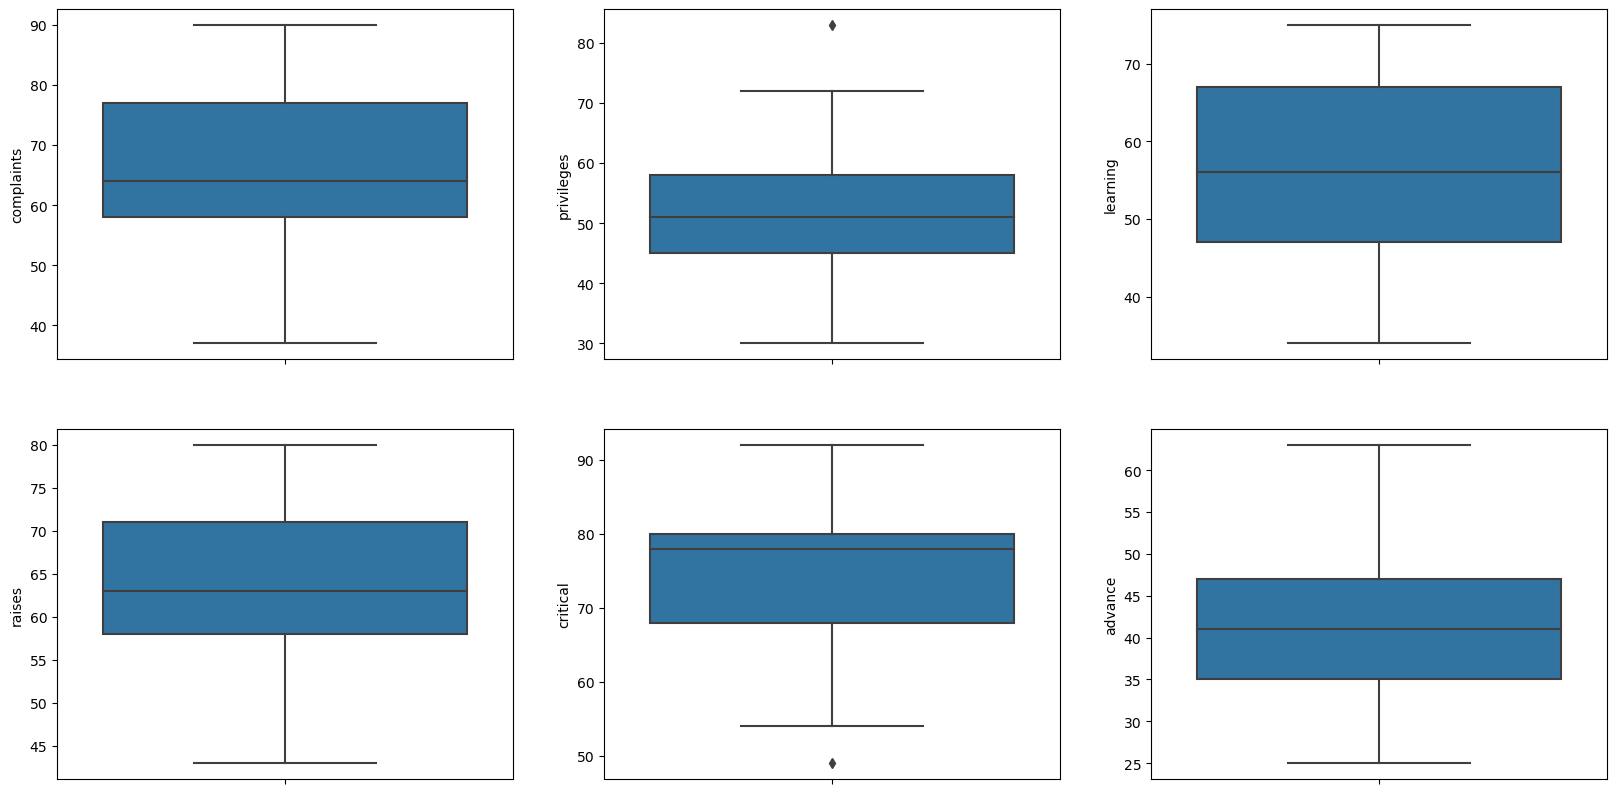

In [108]:
boxplots(df2)

Zależności pomiędzy <span style="color:#591BAB">zmienną objaśnianą</span> (*ang. <span style="color:#591BAB">target</span>*), a <span style="color:#591BAB">zmiennymi objaśniającymi</span> (*ang. <span style="color:#591BAB">predictors</span>*)

In [116]:
def dependences(data, tg, pred):
    fig, axis = plt.subplots(2, 3, figsize=[20, 10])
    idx=0;
    axis=axis.flatten()
    for p in pred:
        data.plot(y=tg, x=p, kind="scatter", ax=axis[idx])
        idx+=1
            
    plt.tight_layout()
    plt.show()

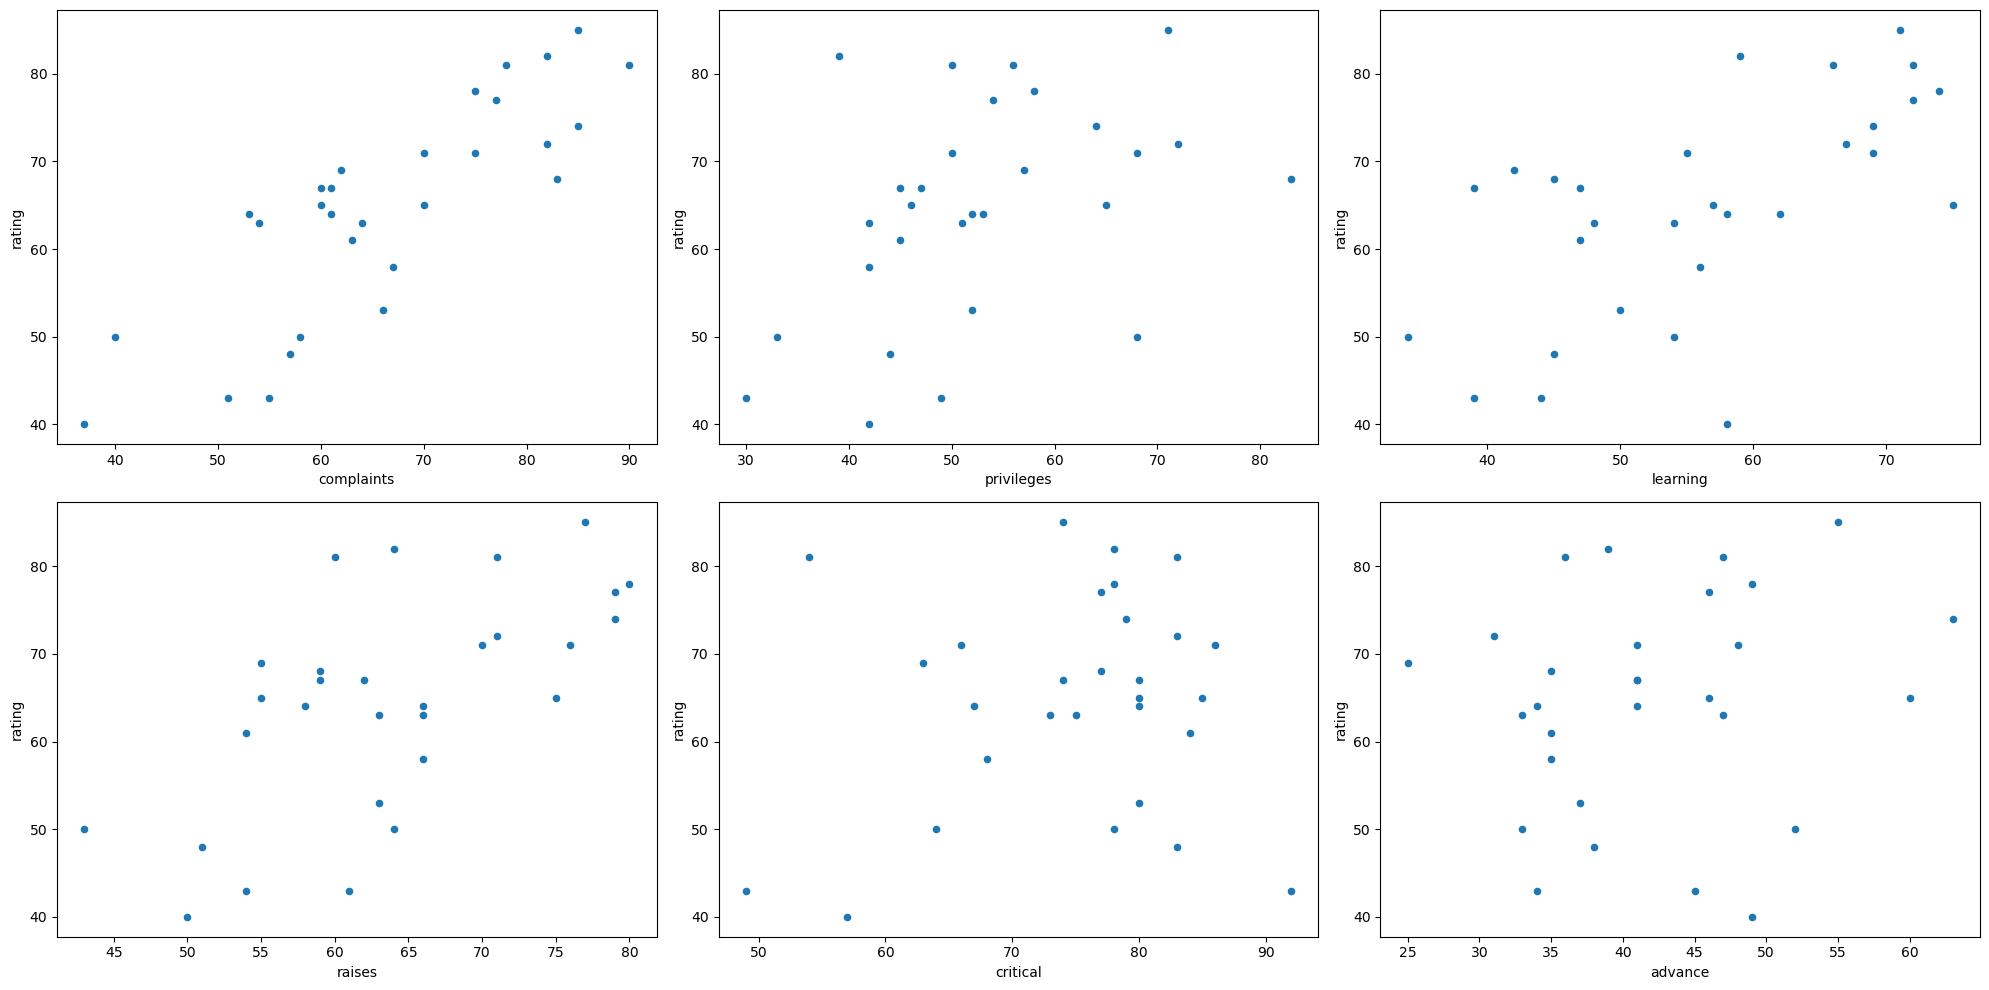

In [117]:
dependences(df2,target,predictors)

## <span style="color:#591BAB">Regresja liniowa</span>

In [141]:
# df3 = df2.drop('complaints', axis=1)
lm2 = build_linear_regression_model(normalized_df, target)
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     10.12
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           2.10e-05
Time:                        13:30:32   Log-Likelihood:                -94.415
No. Observations:                  29   AIC:                             202.8
Df Residuals:                      22   BIC:                             212.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.5862      1.338     48.268      0.000      61.811      67.361
complaints     8.2292      2.200      3.741      0.001       3.667      12.791
privileges    -0.8429      1.694     -0.498      0.624      -4.356       2.670
learning       3.4477      2.270      1.519      0.143      -1.259       8.155
raises         1.0825      2.319      0.467      0.645      -3.726       5.891
critical       0.1982      1.597      0.124      0.902      -3.114       3.511
advance       -1.5888      1.858     -0.855      0.402      -5.442       2.264
==============================================================================
Omnibus:                        3.112   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                1.424
Skew:                          -0.103   Prob(JB):                        0.491
Kurtosis:                       1.934   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
normalized_df=(df2-df2.mean())/df2.std()
normalized_df[target] = df[target]

In [134]:
from statsmodels.api import OLS

def build_linear_regression_model(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    x = sm.add_constant(X)
    model = OLS(y,x).fit()
    return model

In [135]:
lm = build_linear_regression_model(df2, target)

In [136]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     10.12
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           2.10e-05
Time:                        13:22:27   Log-Likelihood:                -94.415
No. Observations:                  29   AIC:                             202.8
Df Residuals:                      22   BIC:                             212.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0954     11.971      0.843      0.408     -14.732      34.923
complaints     0.6140      0.164      3.741      0.001       0.274       0.954
privileges    -0.0691      0.139     -0.498      0.624      -0.357       0.219
learning       0.2903      0.191      1.519      0.143      -0.106       0.687
raises         0.1130      0.242      0.467      0.645      -0.389       0.615
critical       0.0197      0.159      0.124      0.902      -0.309       0.349
advance       -0.1794      0.210     -0.855      0.402      -0.615       0.256
==============================================================================
Omnibus:                        3.112   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                1.424
Skew:                          -0.103   Prob(JB):                        0.491
Kurtosis:                       1.934   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""